<img src="../images/content_recommender.png" alt="1"
	title="" width="150" height="100" style="float:right;" >
<h4>Content recommender algorithms are given user preferences for items and recommend similar items based on a domain-specific notion of item similarity</h4</img>

Compare features of products with the product user liked/purchased.

1. NLP based content commender using Cosine similarites
2. K means clustering

In [177]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
lemmatizer = WordNetLemmatizer()
import regex as re

###  K means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
ds = pd.read_csv("../data/books_desc.csv") 
ds.shape

(10074, 12)

In [64]:
ds.isna().sum()

title                           0
book_id                         0
goodreads_book_id               0
authors                         0
description                     0
original_publication_year       0
language_code_b                 0
average_rating                  0
ratings_count                   0
num_pages                       0
is_ebook                     2268
publication_timeframe           0
dtype: int64

In [ ]:
ds.publication_timeframe =ds.publication_timeframe.replace("unknown",6)
ds.publication_timeframe =ds.publication_timeframe.astype("int")

In [65]:
ds.head(1)

,title,book_id,goodreads_book_id,authors,description,original_publication_year,language_code_b,average_rating,ratings_count,num_pages,is_ebook,publication_timeframe
0,"Angels (Walsh Family, #3)",3998,82747,Marian Keyes,Maggie has always been the white sheep of the ...,2002,0,3.73,25680,448,False,3


In [66]:
ds['title'] =ds['title'].apply(lambda x: x.replace("Weapons of Math Destruction: ",""))
ds.loc[ds['book_id']== 10032,'title'] ='You Are a Badass'

In [186]:
#
ds['title_description'] = ds['authors'] + " " + ds['title'] + " " + ds['description']


In [379]:
def build_nlp_content_recommender(ds, column):
    #min_df : ignore terms that have a document frequency strictly lower than the given threshold
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
    tfidf_matrix = tf.fit_transform(ds[column])
    cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
    return cosine_similarities
cosine_similarities =build_nlp_content_recommender(ds,'title_description') 

In [203]:
def create_bag_of_words(msg):
    #1 remove anything other than alphabets
    #print(msg)
    letters_only = re.sub("[^a-zA-Z]", " ", msg) # Remove non-letters.
    words = letters_only.lower().split()  #Convert to lower case, split into individual words.
    ps= PorterStemmer()
    base_words =[ps.stem(w) for w  in words] 
    return(" ".join(base_words))# 6. Join the words back into one string separated by space, 
ds['title_description'] = ds['title_description'].apply(create_bag_of_words)

def search_by_title(title,strict =True):
    if(strict ==True):
      print(ds.loc[ds['title'].str.lower().str.contains(title.lower()),['title','book_id']])
      return
    arr = title.split(' ')
    for a in arr:
      print(ds.loc[ds['title'].str.lower().str.contains(a.lower()),['title','book_id']])


def book_cluster(book_id):
    return ds.loc[ds['book_id'] == book_id,'Cluster'].values[0]

def book_title(book_id):
    return ds.loc[ds['book_id'] == book_id,'title'].values[0]

def book_author(book_id):
    return ds.loc[ds['book_id'] == book_id,'authors'].values[0]

def book_goodreads_book_id(book_id):
    return ds.loc[ds['book_id'] == book_id,'goodreads_book_id'].values[0]

def recommend_top_books(book_id, ds,cosine_similarities,n=2):
    # indesx of teh row for book being matched
    idx =ds.index[ds['book_id'] ==book_id].values[0]
    
    ## indices for closed match
    closet_match_indices = cosine_similarities[idx].argsort()[:-(n+2):-1] #stores 5 most similar books
    similar_items = [(np.round(cosine_similarities[idx][i],2), ds['book_id'][i],book_id) for i in closet_match_indices]
    print(f"You may also like to read: ")
    for rec in similar_items[1:]:
        print(f"-> {rec[1]} {book_title(rec[1])} score: {rec[0]} ")
        
        

## NLP Content based recommender evaluation

In [189]:
#3275 -Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)score
#print(search_by_title('Harry Potter Boxed Set'))
recommend_top_books(3275,ds,cosine_similarities,2)

You may also like to read: 
-> 2101 The Harry Potter Collection 1-4 (Harry Potter, #1-4) score: 0.69 
-> 6141 Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1) score: 0.68 


In [191]:
#search_by_title('Naked Economics: Undressing the Dismal Science')
recommend_top_books(8084,ds,cosine_similarities,2)

You may also like to read: 
-> 9732 Economics in One Lesson: The Shortest & Surest Way to Understand Basic Economics score: 0.07 
-> 4341 The Undercover Economist score: 0.06 


In [192]:
#search_by_title('Homicidal Psycho Jungle Cat',False)
recommend_top_books(7254,ds,cosine_similarities,2)

You may also like to read: 
-> 1010 The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury score: 0.34 
-> 3628 The Complete Calvin and Hobbes score: 0.29 


In [91]:
#search_by_title('Pride and Prejudice')
recommend_top_books(4844,ds,cosine_similarities,2)

You may also like to read: 
-> 4144 Follow You Home score: 0.18 
-> 7494 The Magpies score: 0.18 


In [92]:
# A Clash of Kings - book id 110
recommend_top_books(110,ds,cosine_similarities,2)

You may also like to read: 
-> 8155 The Hedge Knight (The Tales of Dunk and Egg, #1) score: 1.0 
-> 9257 The Mystery Knight (The Tales of Dunk and Egg, #3) score: 1.0 


In [93]:
#search_by_title('The Great Gatsby')
recommend_top_books(5,ds,cosine_similarities,5)

You may also like to read: 
-> 3641 The Curious Case of Benjamin Button score: 1.0 
-> 2304 This Side of Paradise score: 1.0 
-> 3255 The Beautiful and Damned score: 1.0 
-> 1184 Tender Is the Night score: 1.0 
-> 7409 The Short Stories score: 0.58 


In [185]:
#search_by_title('python')
#Python for Data Analysis
recommend_top_books(10056,ds,cosine_similarities,5)

You may also like to read: 
-> 5630 Idoru (Bridge #2) score: 0.0 
-> 3014 If You Take a Mouse to School score: 0.0 
-> 4450 If You Stay (Beautifully Broken, #1) score: 0.0 
-> 5590 If You Give a Pig a Party score: 0.0 
-> 1939 If You Give a Pig a Pancake  score: 0.0 


In [184]:
#search_by_title('Saints of the Shadow Bible')
recommend_top_books(10078,ds,cosine_similarities,5)

You may also like to read: 
-> 10046 Mortal Causes (Inspector Rebus, #6) score: 1.0 
-> 10030 Exit Music (Inspector Rebus, #17) score: 1.0 
-> 10100 Tooth and Nail (Inspector Rebus, #3) score: 1.0 
-> 10087 The Black Book (Inspector Rebus, #5) score: 1.0 
-> 10035 Hide and Seek (Inspector Rebus, #2) score: 1.0 


In [385]:
#3275 -Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)score
#print(search_by_title('Harry Potter Boxed Set'))
print(recommend_top_books(3275,ds,cosine_similarities,2))

search_by_title('Naked Economics: Undressing the Dismal Science')
print(recommend_top_books(8084,ds,cosine_similarities,2))

#search_by_title('Homicidal Psycho Jungle Cat',False)
print(recommend_top_books(7254,ds,cosine_similarities,2))

#search_by_title('Pride and Prejudice')
print(recommend_top_books(4844,ds,cosine_similarities,2))

# A Clash of Kings - book id 110
print(recommend_top_books(110,ds,cosine_similarities,2))

#search_by_title('The Great Gatsby')
print(recommend_top_books(5,ds,cosine_similarities,5))

#search_by_title('python')
#Python for Data Analysis
print(recommend_top_books(10056,ds,cosine_similarities,5))

#search_by_title('You Are a Badass')
print(recommend_top_books(10032,ds,cosine_similarities,5))
#search_by_title('weapons of math destruction') 
print(recommend_top_books(10103,ds,cosine_similarities,5))

#ds.loc[ds['book_id']== 10032,'title'] ='You Are a Badass'
#'Girl, Wash Your Face / Girl, Stop Apologizing / You Are a Badass'
#ds.loc[ds['book_id']== 10032,'title']

#search_by_title('You Are a Badass')
print(recommend_top_books(10032,ds,cosine_similarities,5))
#search_by_title('weapons of math destruction') 
print(recommend_top_books(10103,ds,cosine_similarities,5))

You may also like to read: 
-> 2101 The Harry Potter Collection 1-4 (Harry Potter, #1-4) score: 0.69 
-> 6141 Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1) score: 0.68 
None
                                               title  book_id
4478  Naked Economics: Undressing the Dismal Science     8084
You may also like to read: 
-> 9732 Economics in One Lesson: The Shortest & Surest Way to Understand Basic Economics score: 0.07 
-> 4341 The Undercover Economist score: 0.06 
None
You may also like to read: 
-> 1010 The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury score: 0.34 
-> 3628 The Complete Calvin and Hobbes score: 0.29 
None
You may also like to read: 
-> 9777 Half Way Home score: 0.15 
-> 3353 Sylvester and the Magic Pebble score: 0.05 
None
You may also like to read: 
-> 3775 A Game of Thrones / A Clash of Kings (A Song of Ice and Fire, #1-2) score: 0.46 
-> 39 A Game of Thrones (A Song of Ice and Fire, #1) score: 0.35 
None
You may also like to r

## Can we improve using K means clustering?

In [120]:
#col_list =['num_pages', 'publication_timeframe','average_rating','language_code_b']
col_list =['average_rating']
X = ds.loc[:, col_list]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [121]:
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(X_sc)
ds['Cluster'] = y
ds['Cluster'].value_counts()

1    3714
0    3382
4    2005
3     966
2       7
Name: Cluster, dtype: int64

In [122]:
#ds[ds['Cluster'] == 1]['average_rating'].describe() # 4.2 - 5
#ds[ds['Cluster'] == 4]['average_rating'].describe() # 3.96 -4.19
#ds[ds['Cluster'] == 2]['average_rating'].describe() #3.6- 3.95
#ds[ds['Cluster'] == 0]['average_rating'].describe() #2.47  -3.67
#ds[ds['Cluster'] == 3]['average_rating'].describe() #0-1.41

In [149]:
for c in range(1,5):
    print(f"cluster ={c}, min={ds[ds['Cluster'] == c]['average_rating'].min()}max={ds[ds['Cluster'] == c]['average_rating'].max()}")
          
#cluster 4 and  custer 1 covers ratings from  4-5

cluster =1, min=0.0max=1.4166666666666667
cluster =2, min=2.47max=3.67
cluster =3, min=3.68max=3.97
cluster =4, min=3.975max=4.21


In [147]:
ds['Cluster'] =ds['Cluster'].map({4:5 , 1:4 , 2: 1 , 3: 2 , 0:3})

In [35]:
# Check out centroids
kmeans.cluster_centers_,kmeans.labels_

(array([[ 0.02158261, -1.11111444,  0.07784418, -0.38780661],
        [ 0.0343972 ,  0.65685296, -0.02380884, -0.38780661],
        [-0.19816135, -0.15234909, -0.08405197,  2.5786048 ]]),
 array([1, 2, 1, ..., 2, 2, 2], dtype=int32))

### elbow method to determine the optimal number of clusters for k-means clustering

,k,inertia,silhouette
0,2,30116.637721,0.446359
1,3,23800.038245,0.299991
2,4,19993.176919,0.283152
3,5,17090.721914,0.300172
4,6,15352.810138,0.299183
5,7,14318.473042,0.286669
6,8,13202.618538,0.285220
7,9,12356.452772,0.265484
8,10,11235.478064,0.265039
9,11,10468.999904,0.264747


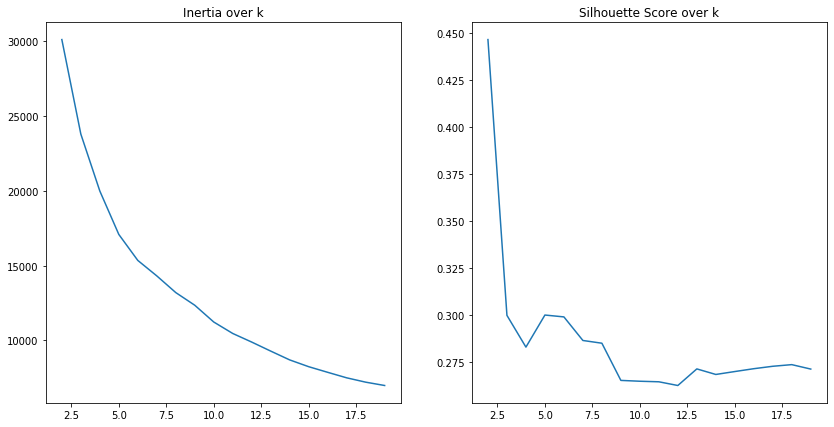

In [40]:
#Inertia - sum of squared errors for each cluster.
#low inertia = dense cluster
from sklearn.metrics import silhouette_score
#silhoutte score -measure of how far apart clusters are. high Silhouette=> well separated clusters
def find_optimal_k(X_sc):
    scores = []
    for k in range(2, 20):
        cl = KMeans(n_clusters=k)
        cl.fit(X_sc)
        inertia = cl.inertia_  #
        sil = silhouette_score(X_sc, cl.labels_)
        scores.append([k, inertia, sil])  
    score_df = pd.DataFrame(scores)
    score_df.columns = ['k', 'inertia', 'silhouette']
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    axes[0].plot(score_df.k, score_df.inertia)
    axes[0].set_title('Inertia over k')
    axes[1].plot(score_df.k, score_df.silhouette);
    axes[1].set_title('Silhouette Score over k')
    return score_df

find_optimal_k(X_sc)

 Notice how the elbow chart does not have a clear elbow. Instead, we see a fairly smooth curve, and it's unclear what is the best value of k to choose. In cases like this, we might try a different method for determining the optimal k, such as computing silhouette scores, or we might reevaluate whether clustering is the right thing to do on our data.

In [114]:
reduced_data = PCA(n_components=1).fit_transform(X_sc)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=ds['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

ValueError: Shape of passed values is (10074, 1), indices imply (10074, 2)

In [124]:
#. Lets Apply K means clustering on the text data
reduced_data = PCA(n_components=1).fit_transform(X_sc)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

ValueError: Shape of passed values is (10074, 1), indices imply (10074, 2)

In [46]:
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(X_sc)
ds['Cluster'] = y
ds['Cluster'].value_counts()

2    3453
1    2550
0    2166
3    1287
4     618
Name: Cluster, dtype: int64

In [129]:
ds[ds['book_id'] ==1]

,title,book_id,goodreads_book_id,authors,description,original_publication_year,language_code_b,average_rating,ratings_count,num_pages,is_ebook,publication_timeframe,title_description,Cluster
7484,"The Hunger Games (The Hunger Games, #1)",1,2767052,Suzanne Collins,"Could you survive on your own, in the wild, wi...",2008,0,4.34,4780653,374,False,3,the hunger game the hunger game,4


5
4
3


In [228]:
ds['title_description'] = ds['authors'] + " " + ds['title'] + " " + ds['description']
ds['title_description'] = ds['title_description'].apply(create_bag_of_words)
tf = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['title_description'])    
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [381]:
def recommend_top_books_incluster(book_id, ds,n=2 ,option ='mixed'):
 #print (f"If you liked book =>\n {ds[ds['book_id'] ==book_id]['title'].values[0]} by  with {ds[ds['book_id'] ==book_id]['average_rating'].values[0]} stars, {cc}")  
 #print(f"You may also like to read  other books from {option}: {ds[ds['book_id'] ==book_id][option].values[0]}")       

        
#  for i in range(5, cc-1, -1):
#     cluster_df = ds[ds['Cluster']==i]
#     cluster_df =cluster_df.append(ds[ds['book_id'] ==book_id])
#     cluster_df.reset_index(inplace=True)
    cc = ds.loc[ds['book_id'] ==book_id,'Cluster'].values[0]
    author =ds[ds['book_id'] ==book_id]['authors'].values[0]
    title =ds[ds['book_id'] ==book_id]['title'].values[0]
#     cluster_df =ds  
#     if(option == 'authors') :
#         cluster_df['title_description'] = cluster_df['authors'].apply(create_bag_of_words)  
#     elif(option =='title'):  
#         cluster_df['title_description'] = cluster_df['title'].apply(create_bag_of_words)  
#     elif(option=='description'):
#         cluster_df['title_description'] = cluster_df['description'].apply(create_bag_of_words) 
#     else :
#         cluster_df['title_description'] = cluster_df['authors'] + " " + cluster_df['title'] + " " + cluster_df['description']
#         cluster_df['title_description'] = cluster_df['title_description'].apply(create_bag_of_words)
          
#     tf = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
#     tfidf_matrix = tf.fit_transform(ds['title_description'])    
#     cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
    idx =ds.index[ds['book_id'] ==book_id].values[0]    
    closet_match_indices = cosine_similarities[idx].argsort()[:-5:-1] 
    similar_items = [(np.round(cosine_similarities[idx][i],2), ds['book_id'][i],book_id) for i in closet_match_indices]
 

    #print(f"|---| --- |---|---|---|")
 
    
    i=0
    for rec in similar_items:
        
        if(0.1 <= rec[0] < 1 ):
            if(i==0):
              print("")
              print(f"|=>{title}| {author} |  | {cc} | {book_id}  ")    
              i=i+1
            print(f"|{book_title(rec[1])} | {book_author(rec[1])} | {rec[0]} | {book_cluster(rec[1])}| {rec[1]} ")

        
#recommend_top_books_incluster(7254,ds)


In [382]:
#2299,547,103,706,2827,3533,6975,4342,6533
lst = [1010,314,4267,189,8399,1694,294,3577,258,2514,570,157,257,3298,255,5,69,2665,8399,769,7983]
lst1 =[189,769,8399,109,451,126,45,275,10,829,1112,
 138,63,211,15,69,81,2665,292,9626,8941,7377,6464,18,4,50,6205,444,47,5505,250,2720,3589,2665,
 16,2514,4739,3679,1029,69,3127,20,17,549,1,1251,55,19,16,255,216,287,39,264,126,115,914,67,779,30,520,274,654,496,5428]
#lst = set(ratings.sort_values(by = ['rating'] ,ascending =False)['book_id'].head(500).to_list())
#ll=[2669,283,68,25,23,3,31,41,51,79,89,91,98,99,107,133,134,141,188,189,167]


In [383]:
recommend_top_books_incluster(8084,ds)

In [384]:
lst_new = [8084,4844,10056,10032]
print("|Title |Author |Score |Cluster|Book id|")
for i in lst_new:
    recommend_top_books_incluster(i,ds)

|Title |Author |Score |Cluster|Book id|

|=>Half Magic (Tales of Magic, #1)| Edward Eager, N.M. Bodecker |  | 3 | 4844  
|Half Way Home | Hugh Howey | 0.15 | 3| 9777 

|=>Python for Data Analysis| [Wes McKinney] |  | 4 | 10056  
|Python Data Science Handbook: Tools and Techniques for Developers | [Jake Vanderplas] | 0.4 | 5| 10053 
|Python for Everybody: Exploring Data in Python 3 | [Charles Severance] | 0.31 | 5| 10057 
|Practical Data Science Cookbook | [Tony Ojeda, Sean Patrick Murphy, Benjamin Bengfort, Abhijit Dasgupta] | 0.27 | 3| 10049 

|=>You Are a Badass| [Rachel Hollis, Jen Sincero] |  | 3 | 10032  
|Girl, Wash Your Face / Girl, Stop Apologizing | [Rachel Hollis] | 0.45 | 3| 10031 
|Girl, Wash Your Face: Stop Believing the Lies about Who You Are So You Can Become Who You Were Meant to Be | [Rachel Hollis] | 0.32 | 3| 10033 
|Summary of Girl, Wash your Face by Rachel Hollis: Conversation Starters | [BookHabits] | 0.27 | 5| 10086 


|Title |Author |Score |Cluster|Book id| |
|---|---|---|---|---|--|
| Homicidal Psycho Jungle Cat  | Bill Watterson  |  -  |5 |
|The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury | Bill Watterson | 0.37 | 5  |
|The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury | Bill Watterson | 0.32 | 5|  
|Calvin and Hobbes | Bill Watterson, G.B. Trudeau | 0.32 | 5 |
|---|---|---|---|
|=>The Lord of the Rings (The Lord of the Rings, #1-3)| J.R.R. Tolkien |  | 5 | 189  
|The Fellowship of the Ring (The Lord of the Rings, #1) | J.R.R. Tolkien | 0.78 | 5| 19 
|J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings | J.R.R. Tolkien | 0.51 | 5| 964 
|---|---|---|---|
|=>First Among Equals| Jeffrey Archer |  | 3 | 8399  
|Paths of Glory | Jeffrey Archer | 0.51 | 3| 7889 
|The Fourth Estate | Jeffrey Archer | 0.51 | 3| 9628 
|False Impression | Jeffrey Archer | 0.51 | 2| 8199 
|---|---|---|---|
|=>Lean Mean Thirteen (Stephanie Plum, #13)| Janet Evanovich |  | 4 | 1694  
|Fearless Fourteen (Stephanie Plum, #14) | Janet Evanovich | 0.6 | 4| 1821 
|Twelve Sharp (Stephanie Plum, #12) | Janet Evanovich | 0.6 | 4| 1627 
|بيكاسو وستاربكس | ياسر حارب | 0.58 | 2| 5373 
|---|---|---|---|
|=>The Vampire's Assistant (Cirque Du Freak, #2)| Darren Shan |  | 4 | 3577  
|The Vampire Prince (Cirque Du Freak, #6) | Darren Shan | 0.57 | 5| 5159 
|Vampire Mountain (Cirque Du Freak, #4) | Darren Shan | 0.55 | 4| 4514 
|A Living Nightmare (Cirque Du Freak, #1) | Darren Shan | 0.53 | 4| 2759 
|---|---|---|---|
|=>Insurgent (Divergent, #2)| Veronica Roth |  | 4 | 69  
|Divergent Series Complete Box Set (Divergent, #1-3) | Veronica Roth | 0.51 | 5| 2880 
|---|---|---|---|
|=>First Among Equals| Jeffrey Archer |  | 3 | 8399  
|Paths of Glory | Jeffrey Archer | 0.51 | 3| 7889 
|The Fourth Estate | Jeffrey Archer | 0.51 | 3| 9628 
|False Impression | Jeffrey Archer | 0.51 | 2| 8199 
|---|---|---|---|
|=>The Complete Sherlock Holmes| Arthur Conan Doyle |  | 5 | 769  
|The Complete Sherlock Holmes, Vol 2 | Arthur Conan Doyle, Kyle Freeman | 0.9 | 5| 1320 
|Sherlock Holmes: The Complete Novels and Stories, Volume I | Arthur Conan Doyle | 0.79 | 5| 5508 
|The Adventures of Sherlock Holmes | Arthur Conan Doyle | 0.67 | 5| 514 
|---|---|---|---|
|=>Visions of Heat (Psy-Changeling #2)| Nalini Singh |  | 4 | 7983  
|Branded by Fire (Psy-Changeling #6) | Nalini Singh | 0.6 | 5| 8267 
|Mine to Possess (Psy-Changeling #4) | Nalini Singh | 0.6 | 4| 9593 
|Kiss of Snow (Psy-Changeling #10) | Nalini Singh | 0.55 | 5| 8408 
|---|---|---|---|
|=>Naked Economics: Undressing the Dismal Science| Charles Wheelan |  | 4 | 8084  
|Economics in One Lesson: The Shortest & Surest Way to Understand Basic Economics | Henry Hazlitt | 0.12 | 5| 9732 
|Thirteen Moons | Charles Frazier | 0.1 | 2| 9928 
|When Crickets Cry | Charles Martin | 0.1 | 5| 9096 
|---|---|---|---|
|=>Python for Data Analysis| [Wes McKinney] |  | 4 | 10056  
|Python Data Science Handbook: Tools and Techniques for Developers | [Jake Vanderplas] | 0.56 | 5| 10053 
|Python Cookbook | [David Beazley, Brian K. Jones] | 0.54 | 4| 10052 
|Data Visualization: A Practical Introduction | [Kieran Healy] | 0.51 | 5| 10021 
|---|---|---|---|
|=>You Are a Badass| [Rachel Hollis, Jen Sincero] |  | 3 | 10032  
|Girl, Wash Your Face / Girl, Stop Apologizing | [Rachel Hollis] | 0.46 | 3| 10031 
|Girl, Wash Your Face: Stop Believing the Lies about Who You Are So You Can Become Who You Were Meant to Be | [Rachel Hollis] | 0.38 | 3| 10033 
|You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life | Jen Sincero | 0.29 | 4| 6071


In [231]:
ratings = pd.read_csv("../data/ratings.csv")

In [232]:
ratings.columns

Index(['user_id', 'book_id', 'rating'], dtype='object')

In [237]:
ratings.sort_values(by = ['rating'] ,ascending =False)['book_id'].to_list()

[258,
 2514,
 353,
 359,
 773,
 1102,
 7737,
 570,
 322,
 377,
 1572,
 283,
 157,
 257,
 3422,
 3298,
 3278,
 2669,
 2299,
 547,
 666,
 766,
 103,
 140,
 7423,
 189,
 769,
 706,
 699,
 1100,
 2827,
 3533,
 6975,
 4324,
 6533,
 8399,
 8512,
 140,
 58,
 116,
 1178,
 497,
 10,
 30,
 313,
 1895,
 2353,
 6288,
 7,
 37,
 682,
 43,
 109,
 451,
 126,
 68,
 45,
 275,
 10,
 829,
 1112,
 138,
 63,
 211,
 15,
 69,
 81,
 2665,
 292,
 9626,
 8941,
 7377,
 6464,
 18,
 4,
 50,
 6205,
 444,
 47,
 5505,
 250,
 2720,
 3589,
 2665,
 16,
 2514,
 4739,
 3679,
 1029,
 69,
 3127,
 20,
 17,
 549,
 1,
 1251,
 55,
 19,
 16,
 255,
 216,
 287,
 39,
 264,
 126,
 115,
 914,
 67,
 779,
 30,
 520,
 274,
 654,
 496,
 5428,
 395,
 6489,
 357,
 1169,
 31,
 85,
 608,
 627,
 388,
 365,
 2514,
 4173,
 1010,
 780,
 1788,
 5207,
 4267,
 1868,
 969,
 989,
 6523,
 1176,
 144,
 1770,
 363,
 190,
 65,
 1143,
 6851,
 359,
 19,
 39,
 188,
 2527,
 18,
 25,
 24,
 23,
 126,
 1105,
 91,
 742,
 1628,
 444,
 7852,
 877,
 2576,
 2356,
 67

In [ ]:
lst = [7254,3275,8084,7254,4844,110,5]

In [ ]:
#3275 -Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)score
#print(search_by_title('Harry Potter Boxed Set'))
print(recommend_top_books(3275,ds,cosine_similarities,2))

search_by_title('Naked Economics: Undressing the Dismal Science')
print(recommend_top_books(8084,ds,cosine_similarities,2))

#search_by_title('Homicidal Psycho Jungle Cat',False)
print(recommend_top_books(7254,ds,cosine_similarities,2))

#search_by_title('Pride and Prejudice')
print(recommend_top_books(4844,ds,cosine_similarities,2))

# A Clash of Kings - book id 110
print(recommend_top_books(110,ds,cosine_similarities,2))

#search_by_title('The Great Gatsby')
print(recommend_top_books(5,ds,cosine_similarities,5))

#search_by_title('python')
#Python for Data Analysis
print(recommend_top_books(10056,ds,cosine_similarities,5))

#search_by_title('You Are a Badass')
print(recommend_top_books(10032,ds,cosine_similarities,5))
#search_by_title('weapons of math destruction') 
print(recommend_top_books(10103,ds,cosine_similarities,5))

#ds.loc[ds['book_id']== 10032,'title'] ='You Are a Badass'
#'Girl, Wash Your Face / Girl, Stop Apologizing / You Are a Badass'
#ds.loc[ds['book_id']== 10032,'title']

#search_by_title('Saints of the Shadow Bible')
recommend_top_books(10078,ds,cosine_similarities,5)

In [349]:
#https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
https://www.kaggle.com/zygmunt/goodbooks-10k#tags.csv

https://www.kdnuggets.com/2019/11/content-based-recommender-using-natural-language-processing-nlp.html


https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847


https://www.linkedin.com/pulse/content-based-recommender-engine-under-hood-venkat-raman/

In [ ]:
lstm